Second Home Assignment

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import time
import pickle
import ast
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import psutil
from PD_freqitems import freqitemsets
from pyfim import pyeclat
from mlxtend.frequent_patterns import fpmax

In [28]:
#Read product names and IDs
lines=open("products.txt", "rt", encoding="utf8").readlines()
prod_dict={}
products=[0]*len(lines)
for lin in lines[1:]:
    pid, pname, aid, did=lin.strip().split("\t")    
    products[int(pid)]=pname
    prod_dict[pid] = pname

prods = products[1:]

#read transactions
import pickle
orders=pickle.load(open("order_products.pickle", "rb"))

#check products on order 2:
#for prod in orders[2]: print(products[prod])
orders_list = [list(order) for order in orders.values()]
#for i in range(len(orders_list)):
#    for j in range(len(orders_list[i])):
#        orders_list[i][j] = prod_dict[str(orders_list[i][j])]
#orders_list
#len(orders_list) #nº transactions

In [19]:
""" with open('transactions.dat', 'w') as file:
    for transaction in orders_list:
        transaction_str = ' '.join(str(product_id) for product_id in transaction)
        file.write(transaction_str + '\n') """

" with open('transactions.dat', 'w') as file:\n    for transaction in orders_list:\n        transaction_str = ' '.join(str(product_id) for product_id in transaction)\n        file.write(transaction_str + '\n') "

In [4]:
""" def load_transactions(file_name, sep=","):
    #input: csv file with one transaction per line,
    #           where transactions may have a different number of items
    #    output: matrix where each row is a vector of items (transaction)
    lines = open(file_name, 'rt').readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(sep)
        transactions_matrix.append(transaction)
    return transactions_matrix

transactions = load_transactions("transactions.dat", sep=" ") """

In [29]:
tr_enc = TransactionEncoder()
#trans_array = tr_enc.fit(list(orders.values())).transform(list(orders.values()), sparse=True)
#binary_database = pd.DataFrame.sparse.from_spmatrix(trans_array, columns=tr_enc.columns_)
te_ary = tr_enc.fit_transform(orders_list, sparse=True)
binary_database = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=tr_enc.columns_)
#df_vertical.to_pickle('trans1.dat')
#binary_database

In [30]:
binary_database.columns = [prod_dict[str(key)] for key in binary_database.columns]
#binary_database

In [7]:
""" tr_enc = TransactionEncoder()
trans_array = tr_enc.fit_transform(transactions, sparse=True)
trans_database = pd.DataFrame.sparse.from_spmatrix(trans_array, columns=tr_enc.columns_) """

In [ ]:
#! python pyfim.py -s60 trans1.dat trans1.out

In [9]:
D={"threshold": [0.2, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01], #0.0199
   "num_itemsets":[],
   "apriori":[], 
   "FP-growth":[], 
   "ECLAT":[], 
   "PD":[]}

for min_supp in D["threshold"]:
    t0 = time.time()
    FI_apriori=apriori(binary_database, min_supp)
    t1 = time.time()
    D["num_itemsets"].append(FI_apriori.shape[0])
    D["apriori"].append(t1-t0)

    FI_fpg = fpgrowth(binary_database, min_supp)
    t2 = time.time()
    D["FP-growth"].append(t2-t1)

    FI_eclat= pyeclat(orders_list, min_supp)    
    t3 = time.time()
    D["ECLAT"].append(t3-t2)

    FI_pdfis= freqitemsets(orders_list, min_supp)    
    t4 = time.time()
    D["PD"].append(t4-t3)

    
    print(min_supp, FI_apriori.shape[0],"\n\tApriori time:", t1-t0, 
          "\n\tFP-growth time:",t2-t1,
          "\n\tECLAT time:", t3-t2,
          "\n\tPD time:", t4-t3)
    

binary_database_performance=pd.DataFrame(D)
binary_database_performance

0.2 0 
	Apriori time: 1.9867587089538574 
	FP-growth time: 10.197198867797852 
	ECLAT time: 42.88787770271301 
	PD time: 20.39624047279358
0.1 2 
	Apriori time: 1.2014329433441162 
	FP-growth time: 10.506941318511963 
	ECLAT time: 40.21112298965454 
	PD time: 28.715095043182373
0.05 6 
	Apriori time: 4.2038350105285645 
	FP-growth time: 32.76709508895874 
	ECLAT time: 82.53215837478638 
	PD time: 50.24441981315613
0.04 11 
	Apriori time: 6.247833728790283 
	FP-growth time: 34.227880239486694 
	ECLAT time: 89.43804907798767 
	PD time: 36.32400059700012
0.03 16 
	Apriori time: 3.3254058361053467 
	FP-growth time: 12.736884832382202 
	ECLAT time: 42.21607160568237 
	PD time: 20.364906549453735
0.02 39 
	Apriori time: 25.713130235671997 
	FP-growth time: 18.984313488006592 
	ECLAT time: 77.75125670433044 
	PD time: 28.813939809799194
0.01 116 
	Apriori time: 699.2721600532532 
	FP-growth time: 44.14092826843262 
	ECLAT time: 60.004554271698 
	PD time: 50.940733432769775


,threshold,num_itemsets,apriori,FP-growth,ECLAT,PD
0,0.20,0,1.986759,10.197199,42.887878,20.396240
1,0.10,2,1.201433,10.506941,40.211123,28.715095
2,0.05,6,4.203835,32.767095,82.532158,50.244420
3,0.04,11,6.247834,34.227880,89.438049,36.324001
4,0.03,16,3.325406,12.736885,42.216072,20.364907
5,0.02,39,25.713130,18.984313,77.751257,28.813940
6,0.01,116,699.272160,44.140928,60.004554,50.940733


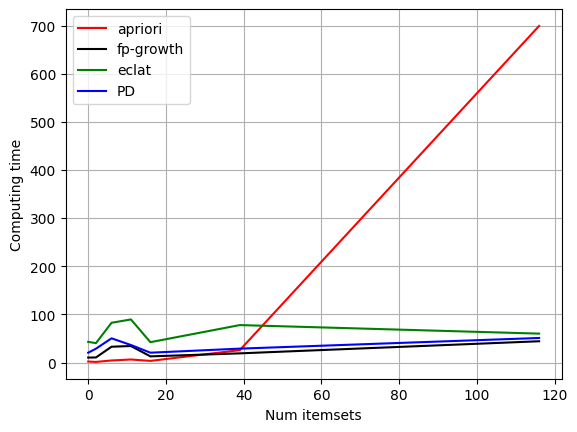

In [10]:
plt.plot(binary_database_performance["num_itemsets"], binary_database_performance["apriori"], c="r", label="apriori")
plt.plot(binary_database_performance["num_itemsets"], binary_database_performance["FP-growth"], c="k", label="fp-growth")
plt.plot(binary_database_performance["num_itemsets"], binary_database_performance["ECLAT"], c="g", label="eclat")
plt.plot(binary_database_performance["num_itemsets"], binary_database_performance["PD"], c="b", label="PD")
plt.xlabel("Num itemsets")
plt.ylabel("Computing time")
plt.grid()
plt.legend()
plt.show()

C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


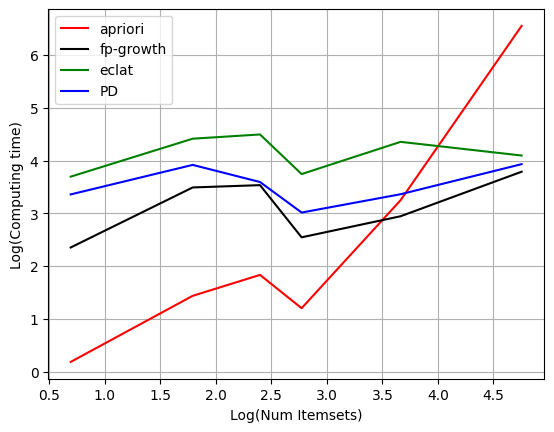

In [11]:
plt.plot(np.log(binary_database_performance["num_itemsets"]), np.log(binary_database_performance["apriori"]), c="r", label="apriori")
plt.plot(np.log(binary_database_performance["num_itemsets"]), np.log(binary_database_performance["FP-growth"]), c="k", label="fp-growth")
plt.plot(np.log(binary_database_performance["num_itemsets"]), np.log(binary_database_performance["ECLAT"]), c="g", label="eclat")
plt.plot(np.log(binary_database_performance["num_itemsets"]), np.log(binary_database_performance["PD"]), c="b", label="PD")
plt.xlabel("Log(Num Itemsets)")
plt.ylabel("Log(Computing time)")
plt.grid()
plt.legend()
plt.show()

**Mining Frequent Itemsets with FP-growth**

In [12]:
FI_fpgrowth = fpgrowth(binary_database, min_support=0.01, use_colnames=True)
FI_fpgrowth

,support,itemsets
0,0.022625,(Carrots)
1,0.020980,(Michigan Organic Kale)
2,0.075251,(Organic Baby Spinach)
3,0.016202,(Organic Ginger Root)
4,0.015419,(Unsweetened Almondmilk)
...,...,...
111,0.019170,"(Bag of Organic Bananas, Organic Strawberries)"
112,0.016609,"(Banana, Organic Avocado)"
113,0.012716,"(Banana, Large Lemon)"
114,0.010558,"(Banana, Organic Fuji Apple)"


In [18]:
all_rules = association_rules(FI_fpgrowth, metric="confidence", min_threshold=0.3) 
all_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Avocado),(Banana),0.054999,0.146993,0.016609,0.301982,2.054395,0.008524,1.222042,0.543109
1,(Organic Fuji Apple),(Banana),0.027880,0.146993,0.010558,0.378693,2.576259,0.006460,1.372923,0.629388


**Mining Frequent Itemsets with ECLAT**

In [20]:
for i in range(len(orders_list)):
    for j in range(len(orders_list[i])):
        orders_list[i][j] = prod_dict[str(orders_list[i][j])]

In [21]:
# Using ECLAT to generate itemsets and rules for support level of 0.01
FI_eclat = pyeclat(orders_list, 0.01)
FI_eclat


,support,itemsets
0,0.010063,"(Feta Cheese Crumbles,)"
1,0.010120,"(Organic Russet Potato,)"
2,0.010199,"(Sparkling Lemon Water,)"
3,0.010230,"(Organic Broccoli Florets,)"
4,0.010547,"(Pure Irish Butter,)"
...,...,...
111,0.017468,"(Organic Strawberries, Banana)"
112,0.019170,"(Organic Strawberries, Bag of Organic Bananas)"
113,0.082331,"(Organic Strawberries,)"
114,0.118030,"(Bag of Organic Bananas,)"


In [38]:
rules = association_rules(FI_eclat, metric="confidence", min_threshold=0.38)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Fuji Apple),(Banana),0.027880,0.146993,0.010558,0.378693,2.576259,0.006460,1.372923,0.629388
1,(Organic Avocado),(Banana),0.054999,0.146993,0.016609,0.301982,2.054395,0.008524,1.222042,0.543109


PD_freqitems

In [46]:
FI_freqitems= freqitemsets(orders_list, 0.01)
FI_freqitems

,support,itemsets
0,0.146993,(Banana)
1,0.118030,(Bag of Organic Bananas)


In [ ]:
""" 
binary_database.columns = binary_database.columns.astype(str)
# set minimum support threshold
min_support = 0.01

# generate frequent itemsets
frequent_itemsets = apriori(binary_database, min_support=min_support, use_colnames=True)

# print the frequent itemsets
print(frequent_itemsets)
 """

In [ ]:
""" 

# Load frequent itemsets from file
frequent_itemsets = pd.read_csv("frequent_itemsets3.csv")

# Generate association rules with confidence >= 60%
all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Show the rules
print(all_rules)
 """

The number of frequent itemsets can vary accordingly to the support threshold given. In this case, we want to detect the presence of 2-itemsets. To see what threshold is more appropriate, we computed the itemsets with three different support thresholds and counted the number of itemsets of each length.

In [22]:
def get_itemsets_counts(binary_database, support_list):
    for support in support_list:
        support_df = fpgrowth(binary_database, min_support=support,use_colnames=True)
        support_df['length'] = support_df['itemsets'].apply(lambda x: len(x))
        itemsets_count = list(support_df['length'].value_counts())
        print('\nWith a minimum support of {} we can get the following itemsets of n size:'.format(support))
        for i in range(1, len(itemsets_count)+1):
            print('{} different {}-itemsets'.format(itemsets_count[i-1], i))

In [99]:
""" def get_itemsets_counts(trans_list, support_list): #I can't get this function to work :(
    itemsets_counts = []
    for support in support_list:
        support_df = pd.DataFrame(pyeclat(trans_list, supp=int(support * len(trans_list))), columns=['itemsets', 'support'])
        support_df['length'] = support_df['itemsets'].apply(lambda x: len(x))
        itemsets_count = support_df['length'].value_counts().to_dict()
        itemsets_counts.append(itemsets_count)
    for i, count_dict in enumerate(itemsets_counts):
        support = support_list[i]
        print(f"\nWith a minimum support of {support}, the number of itemsets of each size are:")
        for j in range(1, max(count_dict.keys())+1):
            print(f"{count_dict.get(j, 0)} itemsets of size {j}") """


In [44]:
""" def get_itemsets_counts(binary_database, support_list):
    for support in support_list:
        support_df = apriori(binary_database, min_support=support, use_colnames=True)
        support_df['length'] = support_df['itemsets'].apply(lambda x: len(x))
        itemsets_count = list(support_df['length'].value_counts())
        print('\nWith a minimum support of {} we can get the following itemsets of n size:'.format(support))
        for i in range(1, len(itemsets_count)+1):
            print('{} different {}-itemsets'.format(itemsets_count[i-1], i))
 """

In [23]:
get_itemsets_counts(binary_database, [0.01])


With a minimum support of 0.01 we can get the following itemsets of n size:
102 different 1-itemsets
14 different 2-itemsets


In [24]:
itemsets_2 = FI_fpgrowth[FI_fpgrowth['itemsets'].apply(len) == 2]
num_itemsets_2 = len(itemsets_2)
print("Number of 2-itemsets: ", num_itemsets_2)

Number of 2-itemsets:  14


In [ ]:
""" itemsets_2 = FI_eclat[FI_eclat['itemsets'].apply(len) == 2]
num_itemsets_2 = len(itemsets_2)
print("Number of 2-itemsets: ", num_itemsets_2) """

Since the support threshold gives us a total of 14 different 2-itemsets, we will proceed to use this value on further analysis.

(ignore the following information; do something similar for the approach we choose)

Since we have a very large dataset, we decided to use the FP Growth algorithm. This algorithm represents the frequent pattern tree that represents the frequent itemsets and has all the information needed to get the different frequent itemsets. This algorithm is more suitable for a large number of transactions than the Apriori, because there is no need for the computation of all candidate sets, allowing for lower memory consumption. This also means that the algorithm only needs to scan the database twice, instead of the multiple scans of the Apriori in order to generate the candidate sets. Overall, this should mean that the FP Growth is more adequate for our problem and should have a smaller computation time.

In [101]:
binary_database_fp = fpgrowth(binary_database, min_support=0.01,use_colnames=True)
binary_database_fp['length'] = binary_database_fp['itemsets'].apply(lambda x: len(x))
binary_database_fp = binary_database_fp.sort_values(['length', 'support'], ascending=[True, False])
binary_database_fp

,support,itemsets,length
10,0.146993,(Banana),1
5,0.118030,(Bag of Organic Bananas),1
11,0.082331,(Organic Strawberries),1
2,0.075251,(Organic Baby Spinach),1
6,0.066436,(Organic Hass Avocado),1
...,...,...,...
108,0.012599,"(Bag of Organic Bananas, Organic Raspberries)",2
103,0.011862,"(Organic Baby Spinach, Organic Strawberries)",2
106,0.010856,"(Organic Baby Spinach, Organic Hass Avocado)",2
114,0.010558,"(Banana, Organic Fuji Apple)",2


**What are the most bought products?**

The support is calculated as the proportion of transactions where a given itemset appears. In order to check what are the most bought products, we will see what are the itemsets with one product (length = 1) that have the highest supports in the store buys, given that this means that these are the products that are more frequently bought.

In [107]:
binary_database_fp[(binary_database_fp['length']==1) & (binary_database_fp['support']>=0.05)]

,support,itemsets,length
10,0.146993,(Banana),1
5,0.118030,(Bag of Organic Bananas),1
11,0.082331,(Organic Strawberries),1
2,0.075251,(Organic Baby Spinach),1
6,0.066436,(Organic Hass Avocado),1
12,0.054999,(Organic Avocado),1


As you can see above, we have this list of most bought items is headed by Banana, which we obtained by adjusting the support to 0.05. According to the support number of this item, we also noticed that we have this product purchased in 15% of the total transactions carried out, while the second most bought item is present in only 12% of the transactions. Half of the rest of the items in this list have a support lower of equal to half of the support of the most bought product.

**Which products are bought together?**

The same logic applies to the products that are bought together. In this case, and since we know that we have itemsets of 2 products, we will filter the frequent itemsets for the length of itemsets to see which set of 2 products are bought together.

In [108]:
binary_database_fp[(binary_database_fp['length']==2) & (binary_database_fp['support']>=0.01)]

,support,itemsets,length
105,0.019391,"(Organic Hass Avocado, Bag of Organic Bananas)",2
111,0.019170,"(Organic Strawberries, Bag of Organic Bananas)",2
110,0.017468,"(Banana, Organic Strawberries)",2
112,0.016609,"(Banana, Organic Avocado)",2
102,0.015987,"(Organic Baby Spinach, Banana)",2
104,0.015668,"(Organic Baby Spinach, Bag of Organic Bananas)",2
115,0.012825,"(Strawberries, Banana)",2
113,0.012716,"(Large Lemon, Banana)",2
107,0.012689,"(Organic Strawberries, Organic Hass Avocado)",2
108,0.012599,"(Bag of Organic Bananas, Organic Raspberries)",2


Following the same reasoning used in the previous question, we have this list of items headed by the two products Organic Hass Avocado and Bag of Organic Bananas, which we obtained by adjusting the support at 0.01. We observed that in the first two itemsets of the list we have in common the presence of the item Bag of Organic Bananas, and in the following ones there is a tendency to purchase at least one item in the household category.

**Generate Association Rules from Frequent Itemsets**

In the association rules, we will begin by generating different rules for a lift threshold of 1 (in order to guarantee that there's no negative correlation between the products) and a given confidence threshold. Based on the first two association rules, we will then filter out these rules with higher values of lift and/or confidence, in order to have a set of more stringent rules.

In [103]:
binary_database_lf = association_rules(binary_database_fp, metric="lift", min_threshold=1)
binary_database_lf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Hass Avocado),(Bag of Organic Bananas),0.066436,0.118030,0.019391,0.291880,2.472945,0.011550,1.245511,0.638011
1,(Bag of Organic Bananas),(Organic Hass Avocado),0.118030,0.066436,0.019391,0.164293,2.472945,0.011550,1.117095,0.675333
2,(Organic Strawberries),(Bag of Organic Bananas),0.082331,0.118030,0.019170,0.232837,1.972702,0.009452,1.149652,0.537319
3,(Bag of Organic Bananas),(Organic Strawberries),0.118030,0.082331,0.019170,0.162414,1.972702,0.009452,1.095612,0.559067
4,(Banana),(Organic Strawberries),0.146993,0.082331,0.017468,0.118832,1.443353,0.005365,1.041424,0.360101
5,(Organic Strawberries),(Banana),0.082331,0.146993,0.017468,0.212163,1.443353,0.005365,1.082720,0.334727
6,(Banana),(Organic Avocado),0.146993,0.054999,0.016609,0.112990,2.054395,0.008524,1.065378,0.601682
7,(Organic Avocado),(Banana),0.054999,0.146993,0.016609,0.301982,2.054395,0.008524,1.222042,0.543109
8,(Organic Baby Spinach),(Banana),0.075251,0.146993,0.015987,0.212445,1.445272,0.004925,1.083108,0.333159
9,(Banana),(Organic Baby Spinach),0.146993,0.075251,0.015987,0.108758,1.445272,0.004925,1.037596,0.361180


In [105]:
binary_database_cf = association_rules(binary_database_fp, metric="confidence", min_threshold=0.2)
binary_database_cf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Hass Avocado),(Bag of Organic Bananas),0.066436,0.118030,0.019391,0.291880,2.472945,0.011550,1.245511,0.638011
1,(Organic Strawberries),(Bag of Organic Bananas),0.082331,0.118030,0.019170,0.232837,1.972702,0.009452,1.149652,0.537319
2,(Organic Strawberries),(Banana),0.082331,0.146993,0.017468,0.212163,1.443353,0.005365,1.082720,0.334727
3,(Organic Avocado),(Banana),0.054999,0.146993,0.016609,0.301982,2.054395,0.008524,1.222042,0.543109
4,(Organic Baby Spinach),(Banana),0.075251,0.146993,0.015987,0.212445,1.445272,0.004925,1.083108,0.333159
5,(Organic Baby Spinach),(Bag of Organic Bananas),0.075251,0.118030,0.015668,0.208217,1.764107,0.006787,1.113904,0.468388
6,(Strawberries),(Banana),0.044466,0.146993,0.012825,0.288434,1.962229,0.006289,1.198775,0.513195
7,(Large Lemon),(Banana),0.047485,0.146993,0.012716,0.267790,1.821783,0.005736,1.164975,0.473575
8,(Organic Raspberries),(Bag of Organic Bananas),0.042632,0.118030,0.012599,0.295519,2.503775,0.007567,1.251944,0.627348
9,(Organic Fuji Apple),(Banana),0.027880,0.146993,0.010558,0.378693,2.576259,0.006460,1.372923,0.629388


In [106]:
binary_database_cf_lf = binary_database_cf[(binary_database_cf["lift"] > 2) & (binary_database_cf["confidence"] > 0.35)].sort_values('lift', ascending=False)
binary_database_cf_lf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Organic Fuji Apple),(Banana),0.02788,0.146993,0.010558,0.378693,2.576259,0.00646,1.372923,0.629388


We can observe an association between products.

**Mining Maximal and Closed itemsets**

To compute the Maximal Frequent Itemsets we will use the FP max from mlextend. As we want to find out relevant associated categories, we will compute the maximal frequent itemsets, which will give us a set of frequent itemsets that do not have any superset with higher support and we will filter these itemsets and exclude the ones that only have a product in order to find relevant associated categories/products.

In [33]:
binary_database_max = fpmax(binary_database, min_support=0.01, use_colnames=True)
binary_database_max['length'] = binary_database_max['itemsets'].apply(lambda x: len(x))
binary_database_max = binary_database_max.sort_values('support', ascending = False)

In [34]:
binary_database_max[binary_database_max['length'] >= 2]

,support,itemsets,length
100,0.019391,"(Bag of Organic Bananas, Organic Hass Avocado)",2
105,0.019170,"(Bag of Organic Bananas, Organic Strawberries)",2
104,0.017468,"(Banana, Organic Strawberries)",2
97,0.016609,"(Banana, Organic Avocado)",2
103,0.015987,"(Banana, Organic Baby Spinach)",2
102,0.015668,"(Organic Baby Spinach, Bag of Organic Bananas)",2
95,0.012825,"(Banana, Strawberries)",2
96,0.012716,"(Banana, Large Lemon)",2
99,0.012689,"(Organic Strawberries, Organic Hass Avocado)",2
92,0.012599,"(Bag of Organic Bananas, Organic Raspberries)",2


In [35]:
FI_fpmax=fpmax(binary_database, min_support=0.1, use_colnames=True)
FI_fpmax

,support,itemsets
0,0.118030,(Bag of Organic Bananas)
1,0.146993,(Banana)


In [54]:
trans_closed = pyeclat(orders_list, 0.1, target="c")    
print("Number of Closed Itemsets", len(trans_closed))
trans_closed

Number of Closed Itemsets 2


,support,itemsets
0,0.118030,"(Bag of Organic Bananas,)"
1,0.146993,"(Banana,)"


In [55]:
trans_maximal = pyeclat(orders_list, 0.1, target="m")    
print("Number of Maximal Itemsets", len(trans_maximal))
trans_maximal

Number of Maximal Itemsets 2


,support,itemsets
0,0.118030,"(Bag of Organic Bananas,)"
1,0.146993,"(Banana,)"


In [66]:
all_rules = association_rules(trans_maximal, metric="confidence", min_threshold=0.7, support_only=True) #I reduced it and it didn't work :(
res=all_rules[all_rules["lift"]>=3]
print("Number of Generated Rules:", len(res))
res

Number of Generated Rules: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [67]:
all_rules = association_rules(trans_closed, metric="confidence", min_threshold=0.7)#I reduced it and it didn't work :(
res=all_rules[all_rules["lift"]>=3]
print("Number of Generated Rules:", len(res))
res

Number of Generated Rules: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
